In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt


In [5]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [12]:
# --------starts here-------
# --------read-----------

# v2_names = ["0button_on", "1button_off", "2calling", "3check", "4circle", "5double_tap", "6fast_swipe", "7finger_press", 
#         "8finger_rub", "9finger_slide",
#         "10hand_rotation", "11hold", "12horizontal_swipe", "13palm_tilt", "14pull", "15push", "16ranctangle", "17round", "18single_tap", "19slow_swipe",
#         "20snapping_finger", "21triangle"]
skip_list = [2,3,4,6,9,10,13,20,21]
skip_people_list = [7]
# skip_list = []
y=[]

for k in range(1):
    for i in range(22):
        if i in skip_list:
            continue
        for j in range(10):
            y.append(i)

# for i in range(22):
#     for j in range(30):
#         y.append(i)

print(len(y))
y_train = y*(9-len(skip_people_list))
y_test = y

tsfresh_feature = pd.read_csv("E:/XingDong/Texadar/data/features_filtered_user.csv")

tsfresh_feature = tsfresh_feature.drop(["id"],axis=1)
# tsfresh_feature = tsfresh_feature.drop([i for i in range(7*220,(7+1)*220)])
# tsfresh_feature = tsfresh_feature.drop([i for i in range(3*220,(3+1)*220)])

selected_list = []
for i in range(22):
    if i in skip_list:
        continue
    for j in range(10):
        selected_list.append(i*10+j)


#----@gadget1 skipping 
# for i in range(10):
#     for skipping in skip_list:
#         try:
#             tsfresh_feature = tsfresh_feature.drop([skipping*10+j+i*220 for j in range(10)])
#         except:
#             print(i)

# for idx in range(10):

X = tsfresh_feature[:]
y = y

print(X.shape)

maxyhat_train = [0,0,0,0,0,0,0,0,0,0]
maxyhat_test = [0,0,0,0,0,0,0,0,0,0]
temp = 0
feature_list = []
result_list = np.zeros(100)

train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]



# for i in range(10,11):
#     for j in range(10,11):
# for i in range(10,20):
for j in range(10,20):
#         x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.75, test_size=0.25)
        ## ----- @modify1 -----
    for people in range(10):
        if people in skip_people_list :continue
            
        train_list = []
        for cjc in range(people):
            if not cjc in skip_people_list:
                train_list = (train_list + [ _+cjc*220 for _ in selected_list ])[:]
        for cjc in range(people+1,10):
            if not cjc in skip_people_list:
                train_list = (train_list + [ _+cjc*220 for _ in selected_list ])[:]
        test_list = []
        test_list = (test_list + [ _+people*220 for _ in selected_list ])[:]
#         print(train_list)
        x_train = tsfresh_feature.iloc[ [_ for _ in train_list]]

        x_test = tsfresh_feature.iloc[test_list]

        clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        train_results[people].append(temp)

        temp = clf.score(x_test, y_test)
        test_results[people].append(temp)
        
#         feature_importances = pd.DataFrame(clf.feature_importances_,
#                                    index = x_train.columns,
#                                     columns=['importance']).sort_values('importance',ascending=False)
#         if (maxyhat_test[people] < temp).any():
#             maxyhat_test[people] = temp
#             for feature in feature_importances.index.tolist()[:50]:
#                 if not feature in feature_list:
#                     feature_list.append(feature)
#
        

print(maxyhat_train)
print(maxyhat_test)



130
(2200, 409)


KeyboardInterrupt: 

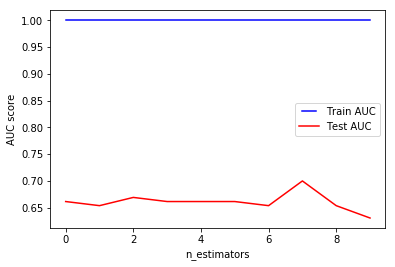

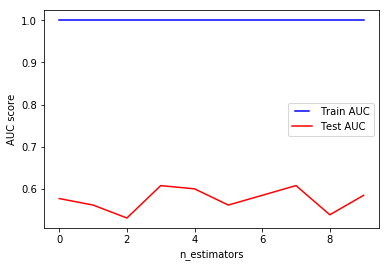

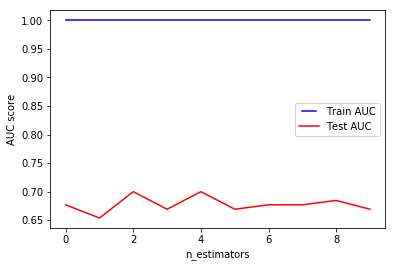

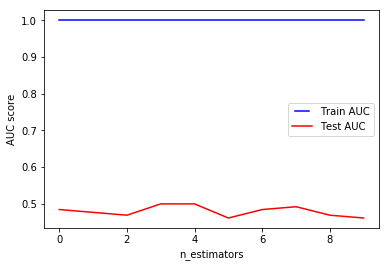

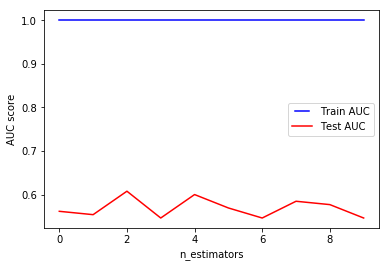

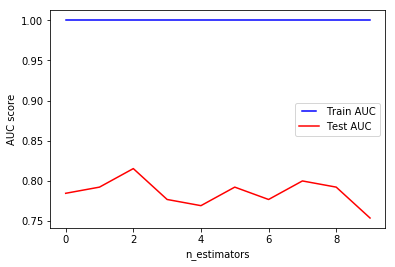

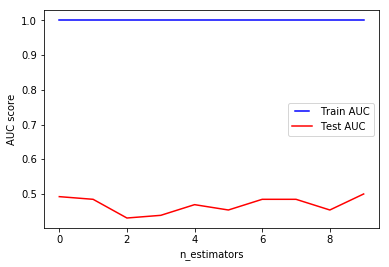

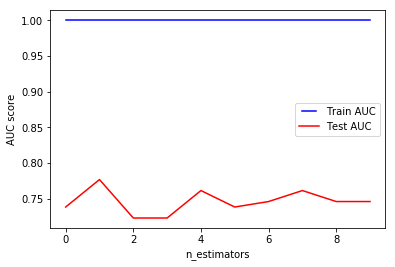

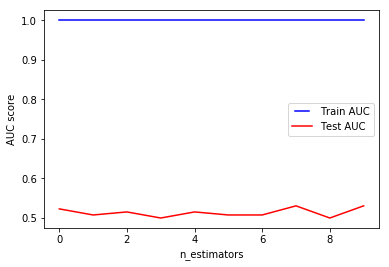

In [7]:
for people in range(10):
    if people in skip_people_list: continue
    line1, = plt.plot(np.arange(10), train_results[people],'b', label='Train AUC')
    line2, = plt.plot(np.arange(10), test_results[people],'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel('n_estimators')
    plt.show()


In [10]:

    
test_results = np.array(test_results.ravel())
test_results.reshape(-1,10)
# np.(test_results.T)

AttributeError: 'list' object has no attribute 'ravel'

In [ ]:
#------ using ranked features ----------#
train_results = []
test_results = []
for i in range(10,20):
    for j in range(10,20):
        x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.8, test_size=0.2)
        clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
#         clf = svm.SVC(C=0.4,kernel='linear',gamma=5)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        train_results.append(temp)
        if (temp > maxyhat_train).any():
            maxyhat_train = temp
        temp = clf.score(x_test, y_test)
        test_results.append(temp)
        if (maxyhat_test < temp).any():
            maxyhat_test = temp

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.arange(100), train_results,'b', label='Train AUC')
line2, = plt.plot(np.arange(100), test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
print(maxyhat_train)
print(maxyhat_test)

In [33]:
#------ adding features from Shutong ------#
# fftfeatures1 = np.loadtxt(fname = "data/22gesture.txt",delimiter=',')
# fftfeatures = np.loadtxt(fname = "data/qstSpectro.txt",delimiter=',')
# fftfeatures = np.concatenate((fftfeatures1,fftfeatures2),axis=0)
fftfeatures = np.loadtxt(fname = "E:/XingDong/Texadar/data/userStudy.txt",delimiter=',')
print(fftfeatures.shape)
_len = len(fftfeatures[:][0])
fft_df = pd.DataFrame(data=fftfeatures[:],    # values
              index=[i for i in range(2200)],    # 1st column as index
              columns=["f"+str(i) for i in range(_len)])

# fft_df = fft_df.drop([i for i in range(7*220,(7+1)*220)])
# fft_df = fft_df.drop([i for i in range(3*220,(3+1)*220)])

for i in range(10):
    for skipping in skip_list:
        try:
            fft_df = fft_df.drop([skipping*10+j+i*220 for j in range(10)])
        except:
            print(i)

features_combine = fft_df.join(X)
features_combine.shape

(2200, 900)


(1300, 1309)

(1300, 1309)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


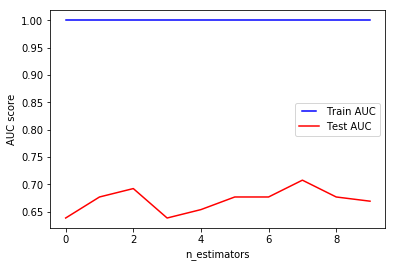

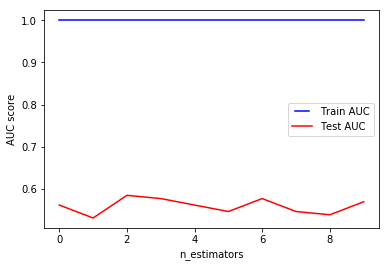

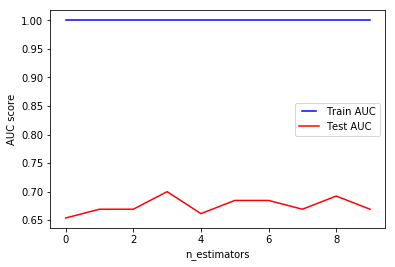

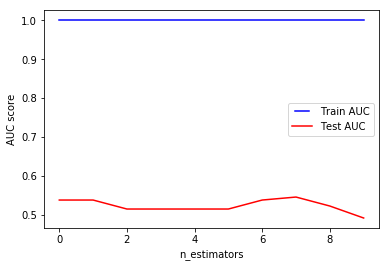

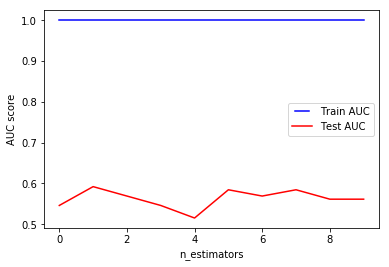

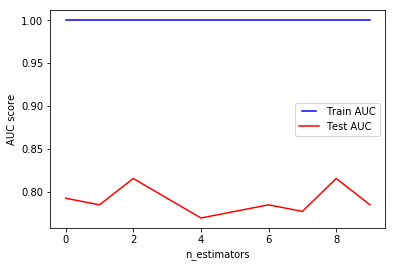

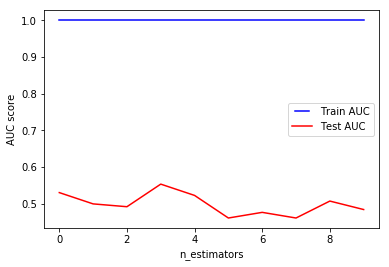

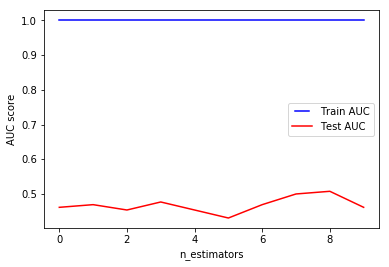

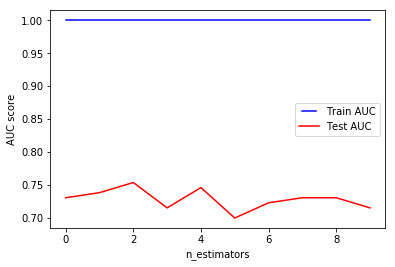

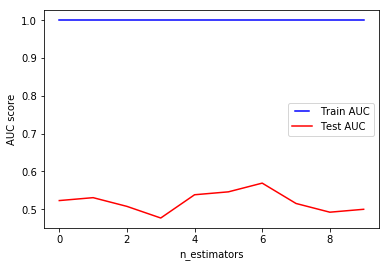

In [34]:
X = features_combine
y = y
print(X.shape)
maxyhat_train=[0,0,0,0,0,0,0,0,0,0]
maxyhat_test=[0,0,0,0,0,0,0,0,0,0]
temp = 0
feature_list=[]
result_list = np.zeros(100)

train_results = [[],[],[],[],[],[],[],[],[],[]]
test_results = [[],[],[],[],[],[],[],[],[],[]]



# for i in range(10,11):
#     for j in range(10,11):
for i in range(10,20):
    for j in range(10,20):
    #         
            ## ----- @modify1 -----
        for people in range(10):
            train_list = []
            for cjc in range(people):
                train_list = (train_list + [ _+cjc*220 for _ in selected_list ])[:]
            for cjc in range(people+1,10):
                train_list = (train_list + [ _+cjc*220 for _ in selected_list ])[:]
            test_list = []
            test_list = (test_list + [ _+people*220 for _ in selected_list ])[:]
            
            
            x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.75, test_size=0.25)
            
    #         print(train_list)
            x_train = tsfresh_feature.iloc[ [_ for _ in train_list]]

            x_test = tsfresh_feature.iloc[test_list]

            clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=j)
            clf.fit(x_train, y_train)
            temp = clf.score(x_train, y_train)
            train_results[people].append(temp)

            temp = clf.score(x_test, y_test)
            test_results[people].append(temp)

    #         feature_importances = pd.DataFrame(clf.feature_importances_,
    #                                    index = x_train.columns,
    #                                     columns=['importance']).sort_values('importance',ascending=False)
    #         if (maxyhat_test[people] < temp).any():
    #             maxyhat_test[people] = temp
    #             for feature in feature_importances.index.tolist()[:50]:
    #                 if not feature in feature_list:
    #                     feature_list.append(feature)
    #


print(maxyhat_train)
print(maxyhat_test)

for people in range(10):
    line1, = plt.plot(np.arange(100), train_results[people],'b', label='Train AUC')
    line2, = plt.plot(np.arange(100), test_results[people],'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel('n_estimators')
    plt.show()

In [ ]:
for people in range(10):
    line1, = plt.plot(np.arange(20), train_results[people],'b', label='Train AUC')
    line2, = plt.plot(np.arange(20), test_results[people],'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel('n_estimators')
    plt.show()

In [ ]:
x_train

In [ ]:
#------------ Random Forest -------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial
import sys,os
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm

X = features_combine
print(X.shape)
maxyhat_train=0.0
maxyhat_test=0.0
temp = 0


result_list = np.zeros(100)
train_results = []
test_results = []
for i in range(10,20):
    for j in range(10,20):
        x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.8, test_size=0.2)

        clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=j)
#         clf = svm.SVC(C=0.4,kernel='linear',gamma=5)
        clf.fit(x_train, y_train)
        temp = clf.score(x_train, y_train)
        train_results.append(temp)

        if (temp > maxyhat_train).any():
            maxyhat_train = temp
        #show_accuracy(y_hat, y_train, '训练集')
        temp = clf.score(x_test, y_test)
        test_results.append(temp)

#         print(temp)

        feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
        result_list[(i-10)*10+(j-10)] = temp
        if (maxyhat_test < temp).any():
            maxyhat_test = temp
            for feature in feature_importances.index.tolist()[:50]:
                if not feature in feature_list:
                    feature_list.append(feature)
            print(len(feature_list))
            
        #show_accuracy(y_hat, y_test, '测试集')

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(np.arange(100), train_results,'b', label='Train AUC')
line2, = plt.plot(np.arange(100), test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

print(maxyhat_train)
print(maxyhat_test)

train_results
test_results


In [ ]:
#------ using ranked features ----------#
bestmodel = 0
maxyhat_test=0
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

v2_names = ["button_on", "button_off", "calling", "check", "circle", "double_tap", "fast_swipe", "finger_press", "finger_rub", "finger_slide",
        "hand_rotation", "hold", "horizontal_swipe", "palm_tilt", "pull", "push", "ranctangle", "round", "single_tap", "slow_swipe",
        "snapping_finger", "triangle"]

v2_names = np.array(v2_names)
y_pred = None
for i in range(10,20):
    for j in range(10,20):
        x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.8, test_size=0.2)
#         x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.8, test_size=0.2)

        clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=j)
#         clf = svm.SVC(C=0.4,kernel='linear',gamma=5)
        model = clf.fit(x_train, y_train)
        temp_train = clf.score(x_train, y_train)
        
        temp_test = clf.score(x_test, y_test)
        if (maxyhat_test < temp_test).any():
            y_pred = clf.predict(x_test)
            maxyhat_train = temp_train
            maxyhat_test = temp_test
            plot_confusion_matrix(y_test, y_pred, classes=v2_names, normalize=True,
                      title='Normalized confusion matrix')
            plt.show()
            print(maxyhat_test)
print(maxyhat_train)
print(maxyhat_test)

In [ ]:
#------ using ranked features ----------#
bestmodel = 0
maxyhat_test=0
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

v2_names = ["button_on", "button_off", "calling", "check", "circle", "double_tap", "fast_swipe", "finger_press", "finger_rub", "finger_slide",
        "hand_rotation", "hold", "horizontal_swipe", "palm_tilt", "pull", "push", "ranctangle", "round", "single_tap", "slow_swipe",
        "snapping_finger", "triangle"]

v2_names = np.array(v2_names)
y_pred = None
for i in range(12,13):
    for j in range(17,18):
#         x_train, x_test, y_train, y_test = train_test_split(X[feature_list], y, random_state=i, train_size=0.8, test_size=0.2)
        skf = StratifiedKFold(n_splits=6)
        for train, test in skf.split(X, y):
#             print("%s %s" % (train, test))
#             x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=i, train_size=0.8, test_size=0.2)
            x_train = X.iloc[train]
            y_train = [y[_] for _ in train]
            x_test = X.iloc[test]
            y_test = [y[_] for _ in test]
            
            clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=j)
    #         clf = svm.SVC(C=0.4,kernel='linear',gamma=5)
            model = clf.fit(x_train, y_train)
            temp_train = clf.score(x_train, y_train)

            temp_test = clf.score(x_test, y_test)
            if (maxyhat_test < temp_test).any():
                y_pred = clf.predict(x_test)
                maxyhat_train = temp_train
                maxyhat_test = temp_test
                plot_confusion_matrix(y_test, y_pred, classes=v2_names, normalize=True,
                          title='Normalized confusion matrix')
                plt.show()
                print(maxyhat_test)
print(maxyhat_train)
print(maxyhat_test)

In [11]:
feature_list

[]

In [ ]:
train = [0,1,2]